**Lab 1**

Q1- Use same method that explain in lecture to show first 6 elements of the dataset. \
Solution: In Line \

Q2- Normalize the data by dividing the values by 255. Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it. \
Solution: loss: 0.4079 - accuracy: 0.8909 \

Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy). \
Solution: loss: 0.3914 - accuracy: 0.8949 \

Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy? \
Solution: We get increased speed \
          loss: 0.4711 - accuracy: 0.8743 \

Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer. \
Solution: No significant increae in accuracy \
 20 Epoch; No Dropout = [loss = 0.7869, accuracy = 0.6429] 
 50 Epoch; No Dropout = [loss = 0.6528, accuracy = 0.6169] 
500 Epoch; No Dropout = [loss = 0.6253, accuracy = 0.6688]
 20 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429] 
 50 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429]
500 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429]

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
# Introduction to Tensorflow
hello = tf.constant("Hello, Tensorflow")
print(hello)

tf.Tensor(b'Hello, Tensorflow', shape=(), dtype=string)


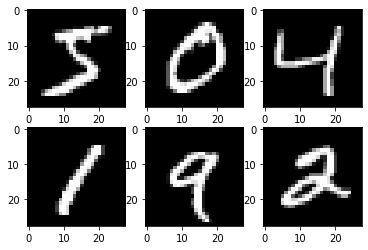

In [41]:
"""
Q1- Use same method that explain in lecture to show first 6 elements of the dataset. You should see:
"""

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 6):
    plt.subplot(2,3, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [42]:
"""
Q2- Normalize the data by dividing the values by 255.
Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it.
"""
X_train, X_test = X_train/255.0, X_test/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
predictions = model(X_train[:1]).numpy()
# print(predictions)
# print(tf.nn.sigmoid(predictions).numpy())
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()
model.compile(
    optimizer='SGD',
    loss = loss_fn,
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4314 - accuracy: 0.6971
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6965 - accuracy: 0.8470
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5233 - accuracy: 0.8716: 0s - loss: 0.5276 - accura - ETA: 0s - loss: 0.5242 - accuracy: 0.
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4493 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8909


In [43]:
"""
Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy).
"""
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD', loss = loss_fn, metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2159 - accuracy: 0.3178 - val_loss: 2.0991 - val_accuracy: 0.5201
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.8705 - accuracy: 0.5699 - val_loss: 1.5618 - val_accuracy: 0.6332
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2895 - accuracy: 0.6877 - val_loss: 1.0350 - val_accuracy: 0.7669
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9158 - accuracy: 0.7732 - val_loss: 0.7709 - val_accuracy: 0.8168
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7234 - accuracy: 0.8184 - val_loss: 0.6271 - val_accuracy: 0.8504
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6089 - accuracy: 0.8439 - val_loss: 0.5373 - val_accuracy: 0.8664
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5347 - accuracy: 0.8604 - val_loss: 0.4789 - val_accuracy:

[0.39139917492866516, 0.8949000239372253]

In [ ]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 

plt.show()

In [44]:
"""
Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?
"""
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    # tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=200)

Epoch 1/50
240/240 [==============================] - 2s 5ms/step - loss: 2.2963 - accuracy: 0.1237 - val_loss: 2.2816 - val_accuracy: 0.1064
Epoch 2/50
240/240 [==============================] - 1s 5ms/step - loss: 2.2692 - accuracy: 0.1697 - val_loss: 2.2579 - val_accuracy: 0.1230
Epoch 3/50
240/240 [==============================] - 1s 5ms/step - loss: 2.2456 - accuracy: 0.2489 - val_loss: 2.2320 - val_accuracy: 0.3439
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 2.2191 - accuracy: 0.3544 - val_loss: 2.2035 - val_accuracy: 0.4221
Epoch 5/50
240/240 [==============================] - 1s 4ms/step - loss: 2.1883 - accuracy: 0.4410 - val_loss: 2.1697 - val_accuracy: 0.3779
Epoch 6/50
240/240 [==============================] - 1s 5ms/step - loss: 2.1515 - accuracy: 0.4895 - val_loss: 2.1284 - val_accuracy: 0.4761
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 2.1068 - accuracy: 0.5309 - val_loss: 2.0781 - val_accuracy: 0.5913
Epoch 

In [45]:
"""
Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.
We don’t expect a good accuracy from this example. That is one of the issues with NN. We need more data to create an accurate model.
"""
dataframe = pd.read_csv(f"{os.getcwd()}\\pima-indians-diabetes.csv")
# dataframe.head()
# dataframe.describe()
y = dataframe['diabete'].to_numpy()
X = dataframe.drop(['ID', 'diabete'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(None, 8)),
    tf.keras.layers.Dense(12, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    # tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])

model2 = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(None, 8)),
    tf.keras.layers.Dense(12, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=20)
a = model.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=50)
b = model.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=500)
c = model.evaluate(X_test, y_test, verbose=2)

model2.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model2.fit(X_train, y_train, validation_split=0.2, epochs=20)
d = model2.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=50)
e = model2.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=500)
f = model2.evaluate(X_test, y_test, verbose=2)

print(f"20 Epoch; No Dropout = {a}", f"50 Epoch; No Dropout = {b}", f"500 Epoch; No Dropout = {c}")
print(f"20 Epoch; Dropout = {d}", f"50 Epoch; Dropout = {e}", f"500 Epoch; Dropout = {f}")

Epoch 1/20
16/16 [==============================] - 1s 13ms/step - loss: 2.2144 - accuracy: 0.5784 - val_loss: 2.0402 - val_accuracy: 0.7073
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 2.0305 - accuracy: 0.6395 - val_loss: 1.8656 - val_accuracy: 0.7073
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 1.8652 - accuracy: 0.6395 - val_loss: 1.7115 - val_accuracy: 0.7073
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 1.7153 - accuracy: 0.6395 - val_loss: 1.5659 - val_accuracy: 0.7073
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 1.5779 - accuracy: 0.6395 - val_loss: 1.4348 - val_accuracy: 0.7073
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 1.4535 - accuracy: 0.6395 - val_loss: 1.3180 - val_accuracy: 0.7073
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 1.3396 - accuracy: 0.6395 - val_loss: 1.2193 - val_accuracy: 0.7073
Epoch 8/20
16/16 [=